<a href="https://colab.research.google.com/github/HR0262/PCMCI-in-commuter-trian/blob/main/PCMCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tigramite
!pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.6/309.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.1 MB/s eta 0:00:00


In [2]:
# Imports
import numpy as np
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import pandas as pd
import pickle
import networkx as nx

In [3]:
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI
from tigramite.jpcmciplus import JPCMCIplus

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS
from tigramite.independence_tests.gpdc import GPDC

from tigramite.plotting import plot_time_series_graph
from tigramite.plotting import plot_graph

In [4]:
df = pd.read_csv(r"/content/data_4041_20230502_mp.csv", index_col=0)
#df.drop(columns=['Unnamed: 0'], inplace=True)
df.index.name = None
display(df)

,1_Tumba,2_Tullinge,3_Flemingsberg,4_Huddinge,5_Stuvsta,6_Älvsjö,7_Årstaberg,8_Stockholms södra,9_Stockholm City,10_Stockholm Odenplan,11_Solna,12_Ulriksdal,13_Helenelund,14_Sollentuna,15_Häggvik,16_Norrviken,17_Rotebro,18_Upplands Väsby,Departure_Time
0_41,112.0,112.0,116.0,100.0,77.0,43.0,45.0,47.0,54.0,7.0,-29.0,-66.0,-33.0,-52.0,-106.0,-16.0,-43.0,-52.0,21720.0
1_40,-18.0,-20.0,1.0,4.0,-10.0,-41.0,-23.0,7.0,18.0,-26.0,-29.0,-53.0,-29.0,-22.0,-71.0,-52.0,-67.0,-47.0,22200.0
2_41,-37.0,-42.0,-30.0,-35.0,-56.0,-100.0,-37.0,-24.0,8.0,-12.0,-38.0,-78.0,-24.0,-41.0,-97.0,-10.0,-47.0,-29.0,23100.0
3_41,149.0,152.0,147.0,134.0,128.0,86.0,87.0,93.0,108.0,63.0,33.0,-4.0,3.0,-8.0,-59.0,-9.0,-38.0,-36.0,23520.0
4_40,-6.0,-6.0,7.0,3.0,-25.0,-66.0,16.0,42.0,73.0,119.0,71.0,45.0,68.0,72.0,20.0,27.0,1.0,13.0,24000.0
5_41,240.0,994.0,1066.0,1074.0,1079.0,1051.0,1168.0,1415.0,1457.0,1632.0,1607.0,1608.0,1572.0,1447.0,1290.0,1230.0,1138.0,1116.0,24420.0
6_41,-40.0,-42.0,-23.0,-20.0,-21.0,-50.0,-23.0,-5.0,28.0,49.0,37.0,23.0,77.0,85.0,40.0,101.0,87.0,85.0,24900.0
7_41,-66.0,-67.0,-59.0,-66.0,-90.0,-107.0,-64.0,-67.0,277.0,233.0,209.0,169.0,171.0,146.0,84.0,122.0,69.0,38.0,25320.0
8_40,10.0,25.0,47.0,52.0,55.0,17.0,39.0,181.0,347.0,414.0,433.0,418.0,457.0,468.0,441.0,453.0,452.0,462.0,25800.0
9_41,8.0,-58.0,-56.0,-68.0,-86.0,-111.0,-57.0,38.0,187.0,331.0,317.0,282.0,281.0,254.0,241.0,319.0,320.0,324.0,26220.0


In [5]:
df_delay = df.drop(columns=["Departure_Time"])
df_delay

,1_Tumba,2_Tullinge,3_Flemingsberg,4_Huddinge,5_Stuvsta,6_Älvsjö,7_Årstaberg,8_Stockholms södra,9_Stockholm City,10_Stockholm Odenplan,11_Solna,12_Ulriksdal,13_Helenelund,14_Sollentuna,15_Häggvik,16_Norrviken,17_Rotebro,18_Upplands Väsby
0_41,112.0,112.0,116.0,100.0,77.0,43.0,45.0,47.0,54.0,7.0,-29.0,-66.0,-33.0,-52.0,-106.0,-16.0,-43.0,-52.0
1_40,-18.0,-20.0,1.0,4.0,-10.0,-41.0,-23.0,7.0,18.0,-26.0,-29.0,-53.0,-29.0,-22.0,-71.0,-52.0,-67.0,-47.0
2_41,-37.0,-42.0,-30.0,-35.0,-56.0,-100.0,-37.0,-24.0,8.0,-12.0,-38.0,-78.0,-24.0,-41.0,-97.0,-10.0,-47.0,-29.0
3_41,149.0,152.0,147.0,134.0,128.0,86.0,87.0,93.0,108.0,63.0,33.0,-4.0,3.0,-8.0,-59.0,-9.0,-38.0,-36.0
4_40,-6.0,-6.0,7.0,3.0,-25.0,-66.0,16.0,42.0,73.0,119.0,71.0,45.0,68.0,72.0,20.0,27.0,1.0,13.0
5_41,240.0,994.0,1066.0,1074.0,1079.0,1051.0,1168.0,1415.0,1457.0,1632.0,1607.0,1608.0,1572.0,1447.0,1290.0,1230.0,1138.0,1116.0
6_41,-40.0,-42.0,-23.0,-20.0,-21.0,-50.0,-23.0,-5.0,28.0,49.0,37.0,23.0,77.0,85.0,40.0,101.0,87.0,85.0
7_41,-66.0,-67.0,-59.0,-66.0,-90.0,-107.0,-64.0,-67.0,277.0,233.0,209.0,169.0,171.0,146.0,84.0,122.0,69.0,38.0
8_40,10.0,25.0,47.0,52.0,55.0,17.0,39.0,181.0,347.0,414.0,433.0,418.0,457.0,468.0,441.0,453.0,452.0,462.0
9_41,8.0,-58.0,-56.0,-68.0,-86.0,-111.0,-57.0,38.0,187.0,331.0,317.0,282.0,281.0,254.0,241.0,319.0,320.0,324.0


# 用车站作为列，车次作为行 分析

分析车站之间的因果关系

In [6]:
dataframe = pp.DataFrame(data = df_delay.values, var_names = df_delay.columns)

In [9]:
parcorr = ParCorr(significance='analytic')
robust_parcorr=RobustParCorr(significance='analytic')
gpdc = GPDC()

# 早高峰
# 筛选前后
cond_ind_test=gpdc #非线性关系
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=cond_ind_test,
    verbosity=1)
tau_max = 5 #评价影响几个车次，1-10个数多少
pc_alpha = 0.05
pcmci.verbosity = 1

# results = pcmci.run_pcmciplus(tau_min=0, tau_max=tau_max, pc_alpha=pc_alpha)
results = pcmci.run_pcmci(tau_min=0, tau_max=tau_max, pc_alpha=None,alpha_level=0.05)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 5
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1




/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarni


## Resulting lagged parent (super)sets:

    Variable 1_Tumba has 4 link(s):
    [pc_alpha = 0.5]
        (3_Flemingsberg -2): max_pval = 0.17200, |min_val| =  0.538
        (12_Ulriksdal -5): max_pval = 0.24800, |min_val| =  0.503
        (1_Tumba -3): max_pval = 0.38200, |min_val| =  0.460
        (3_Flemingsberg -3): max_pval = 0.48800, |min_val| =  0.438

    Variable 2_Tullinge has 3 link(s):
    [pc_alpha = 0.4]
        (14_Sollentuna -5): max_pval = 0.19600, |min_val| =  0.522
        (12_Ulriksdal -5): max_pval = 0.33600, |min_val| =  0.473
        (1_Tumba -3): max_pval = 0.34400, |min_val| =  0.470

    Variable 3_Flemingsberg has 4 link(s):
    [pc_alpha = 0.4]
        (14_Sollentuna -5): max_pval = 0.15400, |min_val| =  0.544
        (7_Årstaberg -2): max_pval = 0.20200, |min_val| =  0.520
        (12_Ulriksdal -5): max_pval = 0.30000, |min_val| =  0.484
        (11_Solna -5): max_pval = 0.36400, |min_val| =  0.464

    Variable 4_Huddinge has 4 link(s):
    [pc_alpha = 0.

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning:


## Significant links at alpha = 0.05:

    Variable 1_Tumba has 10 link(s):
        (2_Tullinge  0): pval = 0.00000 | val =  0.846 | unoriented link
        (13_Helenelund -5): pval = 0.01200 | val =  0.796
        (5_Stuvsta  0): pval = 0.01200 | val =  0.795 | unoriented link
        (8_Stockholms södra  0): pval = 0.01200 | val =  0.785 | unoriented link
        (4_Huddinge  0): pval = 0.01200 | val =  0.778 | unoriented link
        (3_Flemingsberg  0): pval = 0.01400 | val =  0.749 | unoriented link
        (7_Årstaberg -4): pval = 0.03400 | val =  0.700
        (8_Stockholms södra -5): pval = 0.03400 | val =  0.697
        (3_Flemingsberg -2): pval = 0.04200 | val =  0.690
        (9_Stockholm City  0): pval = 0.04200 | val =  0.687 | unoriented link

    Variable 2_Tullinge has 18 link(s):
        (3_Flemingsberg  0): pval = 0.00000 | val =  0.947 | unoriented link
        (6_Älvsjö  0): pval = 0.00000 | val =  0.946 | unoriented link
        (5_Stuvsta  0): pval = 0.00000 | va

p_matrix[i, j, tau]	vs val_matrix[i, j, tau]

统计检验的 p 值（显著性），条件独立性检验的 统计量（强度），❌ 越小越显著，< 0.05 常用于筛选， 用来判断是否显著、有因果边

val_matrix[i, j, tau]，条件独立性检验的 统计量（强度），✅ 越大（或绝对值大）说明依赖更强，用来排序因果边强弱

用法p < 0.05 筛选显著因果边。用 p_matrix 做初步筛选，再用 val_matrix 判断因果强度。

In [24]:
print(results.keys())

p_matrix=results['p_matrix']
print(p_matrix.shape)
array_1d_p_matrix = p_matrix.reshape(-1)
print(array_1d_p_matrix.shape)
print(len(array_1d_p_matrix[array_1d_p_matrix<0.05]))
graph=results['graph']
print(graph.shape)
array_1d_graph = graph.reshape(-1)
print(array_1d_graph.shape)
print(len(array_1d_graph[array_1d_graph!='']))

dict_keys(['graph', 'p_matrix', 'val_matrix', 'conf_matrix'])
(18, 18, 6)
(1944,)
272
(18, 18, 6)
(1944,)
276


进行筛选

后续站点不会对当前站点造成影响，当前站点的前序车次不会对当前造成影响

In [27]:
graph_clean = results['graph'].copy()  # 不直接修改原始数据，避免污染
var_names = dataframe.var_names  # 例如 ["0_Stockholm", "1_Sundbyberg", ..., "14_Sollentuna"]

# 提取每个变量的站点编号（前面的数字）
station_indices = [int(name.split("_")[0]) for name in var_names]

# 遍历所有 target, source, tau 组合
num_vars = graph_clean.shape[0]
tau_max_plus1 = graph_clean.shape[2]

for i in range(num_vars):       # target
    for j in range(num_vars):   # source
        for tau in range(tau_max_plus1):
            target_idx = i+1
            source_idx = j+1

            # 如果后续站点影响当前站点，则置为空字符串
            if source_idx > target_idx:
                graph_clean[i, j, tau] = ''
print(graph_clean.shape)
array_1d_graph_clean = graph_clean.reshape(-1)
print(array_1d_graph_clean.shape)
print(len(array_1d_graph_clean[array_1d_graph_clean!='']))

(18, 18, 6)
(1944,)
127


已完成graph删除后节点到前节点的因果

未来代码：和p<0.05取交集，数不同tau下的数量

In [ ]:
# need to do

边上的数字是前n个站点的延误对当前站点的因果影响

节点颜色的深浅代表auto-MCI values，表明了过去车次对站点的因果影响

边的颜色深浅代表cross-MCI values，表明了其他站点对该站点的因果影响

(<Figure size 1200x600 with 1 Axes>, <Axes: >)

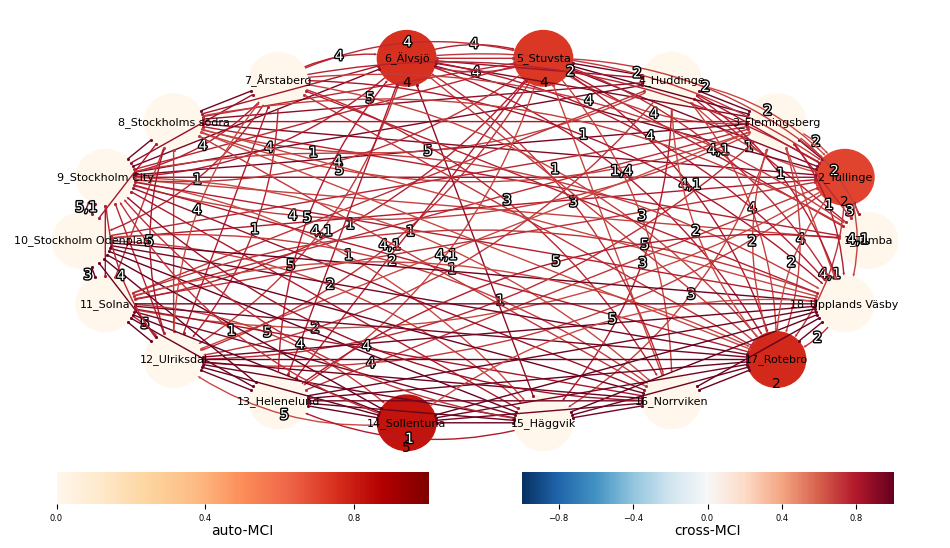

In [13]:
# 需要跟前面节点进行筛选配合，筛选p_matrix，val_matrix

# 设置显著性水平
alpha_level = 0.05

# 从 p_matrix 生成布尔型因果图
graph = pcmci.get_graph_from_pmatrix(
    p_matrix=results['p_matrix'],
    alpha_level=alpha_level,
    tau_min=0,
    tau_max=tau_max
)
# 绘图
plot_graph(
    graph=graph,
    val_matrix=results['val_matrix'],             # 测试统计值，通常是偏相关或其他统计量
    var_names=dataframe.var_names,                # 变量名称（你自己的时间序列名称）
    link_colorbar_label='cross-MCI',                # 显示边的颜色表示的含义（例如：偏相关系数）
    figsize=(12, 6),                              # 图像大小
    alpha=1.0,                                    # 图形的透明度
    arrow_linewidth=1.0,                          # 箭头的线宽
    node_size=0.3,                                # 节点大小
    curved_radius=0.2,                            # 边的弯曲度
    label_fontsize=10,                            # 标签字体大小
    node_label_size=8,                           # 节点标签字体大小
    cmap_edges='RdBu_r',                          # 边的颜色映射（红蓝渐变）
    cmap_nodes='OrRd',                            # 节点的颜色映射
    show_colorbar=True,                           # 显示颜色条
    show_autodependency_lags=True,                # 显示自依赖延迟
    vmin_edges=-1,                                # 边的颜色条范围
    vmax_edges=1.0,                               # 边的颜色条范围
    vmin_nodes=0,                                 # 节点颜色条范围
    vmax_nodes=1.0                                # 节点颜色条范围
)

(<Figure size 1200x600 with 1 Axes>, <Axes: >)

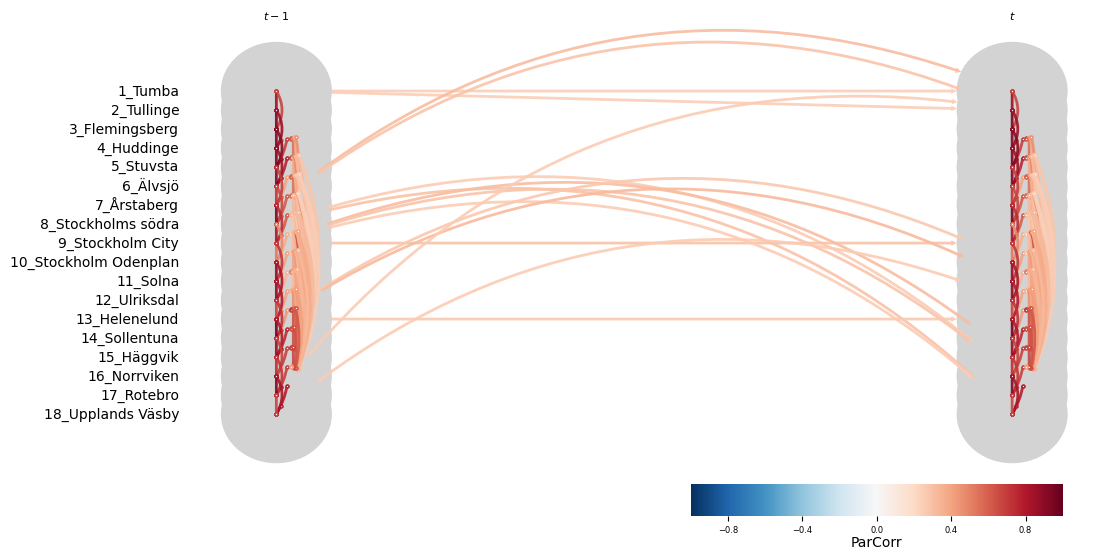

In [ ]:
# 设置显著性水平
alpha_level = 0.05

# 从 p_matrix 生成布尔型因果图
graph = pcmci.get_graph_from_pmatrix(
    p_matrix=results['p_matrix'],
    alpha_level=alpha_level,
    tau_min=0,
    tau_max=tau_max
)

# 绘图
plot_time_series_graph(
    graph=graph,
    val_matrix=results['val_matrix'],             # 偏相关值/测试统计值
    var_names=dataframe.var_names,                # 节点名字
    link_colorbar_label='ParCorr',                # 显示偏相关值的图例
    figsize=(12, 6),                              # 图像大小
    alpha=0.9,                                    # 边透明度
    arrow_linewidth=2.0,                          # 箭头线宽
    node_size=0.3,                                # 节点大小
    curved_radius=0.3                             # 边曲率
)